## IGD - M - Índice de Gestão Descentralizada do Município - Fator 1

O Índice de Gestão Descentralizada é um indicador que mede a quantidade de ações realizadas pleo município nas ações de cadastramento, atualização cadastral e de acompanhamento das condicionalidades de educação e saúde. Também verifica se o município aderiu ao Sitena Único de Assistência Social (Suas) e se as gestões e os Conselhos Municipais registraram, no Sistema SuasWeb, as informações relativas à prestação de contas.

Com base no valor do IGD-M alcançado, o Ministério do Desenvolvimento e Assistência Social, Família e Combate à Fome (MDS) calcula, a cada mês, quanto cada município vai receber. Os recursos financeiros são repassados apenas para os municípios que tenham alcançado índices mínimos nas taxas e na média das taxas do cálculo do IGD-M, além de terem aderido à gestão do Suas e registrado a comprovação dos gastos e a aprovação da prestação de contas do ano anterior no Sistema SuasWeb.

O cálculo do IGD-M é composto por quatro fatores de operação: 1) taxa de atualização cadastral e taxas de acompanhamento das condicionalidades da saúde e educação; 2) adesão ao Sistema Único de Assistência Social (Suas); 3) prestação de contas; e 4) parecer das contas do uso dos recursos.

Foram utilizados para este exercício penas os dados do Fator de Operação 1, cujo cálculo corresponde à médca aritimética simples das seguintes variáveis:

1. **TAC - Taxa de Atualização Cadastral**, calculada pela divisão total de cadastros válidos de famílias com renda "per capta" até meio salário mínimo atualizados nos últimos dois anos no Cadastro Único no município; e
   
2. do resultado do acompanhamento de condicionalidades do programa Bolsa Família, composto pela média aritimética simpes das Taxas de:
   
   1) **TAFE - Taxa de Acompanhamento da Frequência Escolar**, calculada pela divisão do somatório do número de crianças e adolescentes pertencentes às famílias beneficiários do Programa Bolsa Família com perfil educação no município e com informações da frequência escolar, pelo número total de crianças e adolescentes pertencentes a famílias beneficiárias do Programa Bolsa Família com perfil educação no município; e
      
   2) **TAAS - Taxa de Acompanhamento da Agenda de Saúde**, calculada pela divisão do público com perfil saúde no município e com informações de acompanhamento de condionalidade de saúde, pelo número total do público com perfil de saúde no município.
# Dados utilizados

A equipe buscou os dados no Portal de Dados Abertos, na página do Ministério do Desenvolvimento Social (https://dados.gov.br/dados/conjuntos-dados/indice-de-gestao-descentralizada---igd---mi-social), porém apresentaram incompatibilidade. A solução foi extrair os valores do VIS Data, que é um sistema de gerenciamento e visualização dos diversos programas, ações e serviços do Ministério do Desenvolvimento Social https://aplicacoes.cidadania.gov.br/vis/data3/data-explorer.php).

Para análise foram utilizados os valores de Fator de Operação 1 do mês de julho de 2023. 

# Municípios com Fator 1 igual a zero

São os municípios que não apresentaram um ou mais dados necessários ao cálculo do Fator de Operação 1.


In [66]:
import pandas as pd

In [63]:
caminho_arquivo = 'data/bases/Data_IGD_VIS.csv'

In [62]:
#decodificando o arquivo
try:
    # Tenta abrir com ',' como separador
    pd_igd_vis = pd.read_csv(caminho_arquivo, sep = ",", encoding='UTF-8')
except pd.errors.ParserError:
    # Se ocorrer um erro, tente abrir com ';' como separador
    pd_igd_vis = pd.read_csv(caminho_arquivo, sep = ";", encoding='UTF8')

In [4]:
pd_igd_vis.head()

Código Unidade Territorial  UF Referência  \
0  120001          ACRELÂNDIA  AC     jul/23   
1  120005        ASSIS BRASIL  AC     jul/23   
2  120010           BRASILÉIA  AC     jul/23   
3  120013              BUJARI  AC     jul/23   
4  120017            CAPIXABA  AC     jul/23   

  TAFE - Taxa de Acompanhamento de Frequência Escolar  \
0                                              67,55    
1                                               62,2    
2                                              55,69    
3                                              73,72    
4                                               72,2    

  TAAS - Taxa de Acompanhamene Agenda de Saúde  \
0                                        94,46   
1                                        74,33   
2                                        84,09   
3                                        83,85   
4                                        80,24   

  TAC - Taxa de Atualização Cadastral  \
0                               83,01   
1                               89,93   
2                               85,07   
3                               92,11   
4                               88,61   

  Fator 1: Operação (  (TAFE+TAAS) / 2 +  TAC / 2)  
0                                               82  
1                                            79,09  
2                                            77,48  
3                                            85,44  
4                                            82,41

In [5]:
pd_igd_vis.info

<bound method DataFrame.info of       Código Unidade Territorial  UF Referência  \
0     120001          ACRELÂNDIA  AC     jul/23   
1     120005        ASSIS BRASIL  AC     jul/23   
2     120010           BRASILÉIA  AC     jul/23   
3     120013              BUJARI  AC     jul/23   
4     120017            CAPIXABA  AC     jul/23   
...      ...                 ...  ..        ...   
5565  172120      TOCANTINÓPOLIS  TO     jul/23   
5566  172125            TUPIRAMA  TO     jul/23   
5567  172130          TUPIRATINS  TO     jul/23   
5568  172208        WANDERLÂNDIA  TO     jul/23   
5569  172210             XAMBIOÁ  TO     jul/23   

     TAFE - Taxa de Acompanhamento de Frequência Escolar  \
0                                                 67,55    
1                                                  62,2    
2                                                 55,69    
3                                                 73,72    
4                                                  72,2

In [8]:
# removendo colunas que não preciso
remover_colunas = ['TAFE - Taxa de Acompanhamento de Frequência Escolar' , 'TAAS - Taxa de Acompanhamene Agenda de Saúde' , 'TAC - Taxa de Atualização Cadastral']
df_igd = pd_igd_vis.drop(remover_colunas, axis = 1)

In [9]:
#renomeando colunas
df_igd = df_igd.rename(columns={'Código': 'ibge_6', 'Unidade Territorial': 'municipio' , 'Referência' : 'ano_mês' , 'Fator 1: Operação (  (TAFE+TAAS) / 2 +  TAC / 2)': 'igd_m'} )

In [10]:
#convertendo a coluna igd_m em numeric
df_igd['igd_m'] = pd.to_numeric(df_igd['igd_m'].str.replace(',', '.', regex=True), errors='coerce')

In [13]:
# Ordenando o DataFrame pelo valor do IGD em ordem crescente
df_igd = df_igd.sort_values(by='igd_m', ascending=False)

# Criar uma nova coluna chamada 'Ranking' com o ranking do IGD-M
df_igd['Ranking'] = df_igd['igd_m'].rank(ascending=False, method='first')

# Exibir o DataFrame
print(df_igd)

      ibge_6             municipio  UF ano_mês  igd_m  Ranking
5210  353770               PIACATU  SP  jul/23  99.20      1.0
4406  432330           VILA FLORES  RS  jul/23  99.13      2.0
4231  431445                PINHAL  RS  jul/23  98.32      3.0
5039  352215                ITAOCA  SP  jul/23  97.92      4.0
3435  411729        NOVO ITACOLOMI  PR  jul/23  97.67      5.0
...      ...                   ...  ..     ...    ...      ...
4581  421110         MONTE CASTELO  SC  jul/23    NaN      NaN
4933  351330              CRUZÁLIA  SP  jul/23    NaN      NaN
5108  352870       MARABÁ PAULISTA  SP  jul/23    NaN      NaN
5258  354210                RAFARD  SP  jul/23    NaN      NaN
5424  355690  VISTA ALEGRE DO ALTO  SP  jul/23    NaN      NaN

[5570 rows x 6 columns]


In [14]:
#tranformando os valores nulos em zero
df_igd ['igd_m'] = df_igd ['igd_m']. fillna(0)

In [15]:
df_igd.tail()

ibge_6             municipio  UF ano_mês  igd_m  Ranking
4581  421110         MONTE CASTELO  SC  jul/23    0.0      NaN
4933  351330              CRUZÁLIA  SP  jul/23    0.0      NaN
5108  352870       MARABÁ PAULISTA  SP  jul/23    0.0      NaN
5258  354210                RAFARD  SP  jul/23    0.0      NaN
5424  355690  VISTA ALEGRE DO ALTO  SP  jul/23    0.0      NaN

In [16]:
#Vou visualizar novamente meus dados para entender de que forma eu posso agrupá-los
df_igd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5570 entries, 5210 to 5424
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ibge_6     5570 non-null   int64  
 1   municipio  5570 non-null   object 
 2   UF         5570 non-null   object 
 3   ano_mês    5570 non-null   object 
 4   igd_m      5570 non-null   float64
 5   Ranking    5543 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 304.6+ KB


In [17]:
# verificando quantas linhas temos com valor zero e quais municípios são
contagem_zeros = (df_igd['igd_m'] == 0).sum()

print("Número de linhas com valor zero na coluna: ", contagem_zeros)

linhas_com_zero = df_igd.loc[df_igd['igd_m'] == 0]

print(linhas_com_zero)

Número de linhas com valor zero na coluna:  27
      ibge_6              municipio  UF ano_mês  igd_m  Ranking
144   130130                CODAJÁS  AM  jul/23    0.0      NaN
154   130200             ITAPIRANGA  AM  jul/23    0.0      NaN
228   290220                ARAMARI  BA  jul/23    0.0      NaN
303   290830   CONCEIÇÃO DO ALMEIDA  BA  jul/23    0.0      NaN
306   290860                  CONDE  BA  jul/23    0.0      NaN
359   291310                IBITITÁ  BA  jul/23    0.0      NaN
423   291860               JUSSIAPE  BA  jul/23    0.0      NaN
574   293030          SERRA DOURADA  BA  jul/23    0.0      NaN
2432  150110                  BAGRE  PA  jul/23    0.0      NaN
2434  150125                BANNACH  PA  jul/23    0.0      NaN
2540  150746      SÃO JOÃO DA PONTA  PA  jul/23    0.0      NaN
3742  240520                JANDUÍS  RN  jul/23    0.0      NaN
3941  430107        ARROIO DO PADRE  RS  jul/23    0.0      NaN
4037  430593          CORONEL PILAR  RS  jul/23    0.0   

In [18]:
#criando um gráfico de barras com os dez munícipios com menor IGD-M

import matplotlib.pyplot as plt

# Ordeando os valores de 'igd_m' em ordem decrescente para os 10 municipios com menor taxa
top_10_municipios_menor = df_igd.sort_values(by='igd_m', ascending=True).head(10)

In [19]:
#nenhum munícipio tem igd_m, então o grafico fica vazio
top_10_municipios_menor

ibge_6             municipio  UF ano_mês  igd_m  Ranking
5424  355690  VISTA ALEGRE DO ALTO  SP  jul/23    0.0      NaN
144   130130               CODAJÁS  AM  jul/23    0.0      NaN
154   130200            ITAPIRANGA  AM  jul/23    0.0      NaN
228   290220               ARAMARI  BA  jul/23    0.0      NaN
303   290830  CONCEIÇÃO DO ALMEIDA  BA  jul/23    0.0      NaN
306   290860                 CONDE  BA  jul/23    0.0      NaN
359   291310               IBITITÁ  BA  jul/23    0.0      NaN
423   291860              JUSSIAPE  BA  jul/23    0.0      NaN
574   293030         SERRA DOURADA  BA  jul/23    0.0      NaN
2432  150110                 BAGRE  PA  jul/23    0.0      NaN

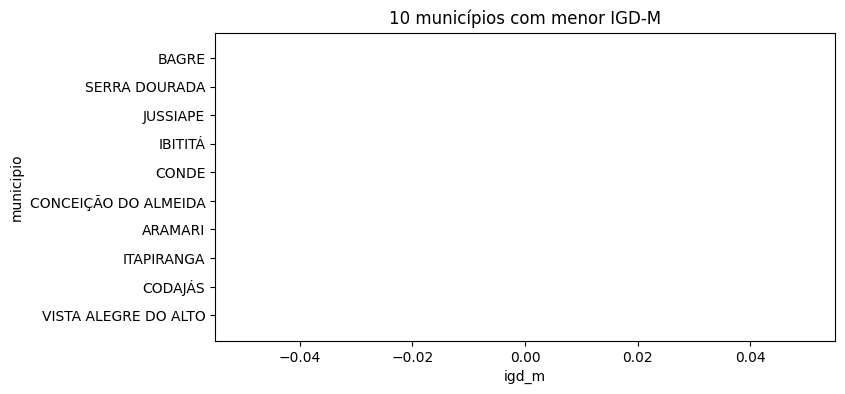

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

# Plota o gráfico de barras horizontais no subplot 'ax'
ax.barh(top_10_municipios_menor['municipio'], top_10_municipios_menor['igd_m'], color='#6B2D58')

# Configurações do subplot 'ax'
ax.set_xlabel('igd_m')
ax.set_ylabel('municipio')
ax.set_title('10 municípios com menor IGD-M')
ax.tick_params(axis='x')  # Rotaciona os rótulos do eixo x

# Exibe a figura
plt.show()

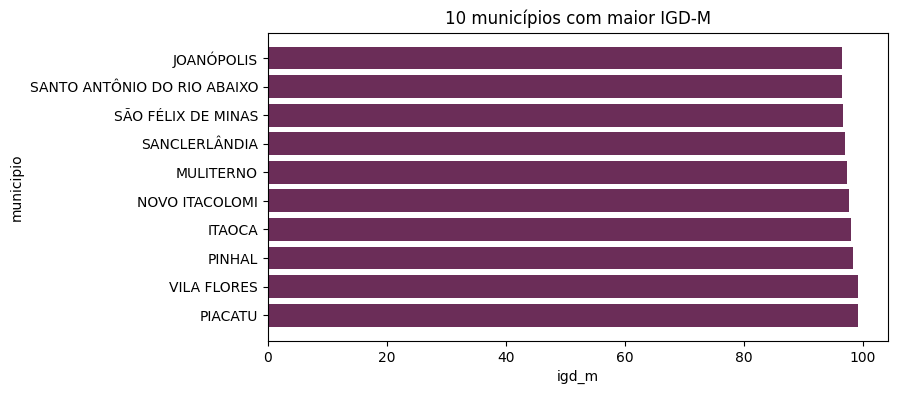

In [21]:
#Agora a mesma coisa para os dez municípios com as maiores taxas de IGD-M
top_10_municipios_maior = df_igd.sort_values(by='igd_m', ascending=False).head(10)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

# Plota o gráfico de barras horizontais no subplot 'ax'
ax.barh(top_10_municipios_maior['municipio'], top_10_municipios_maior['igd_m'], color='#6B2D58')

# Configurações do subplot 'ax'
ax.set_xlabel('igd_m')
ax.set_ylabel('municipio')
ax.set_title('10 municípios com maior IGD-M')
ax.tick_params(axis='x')  # Rotaciona os rótulos do eixo x

# Exibe a figura
plt.show()

In [22]:
#Dividindo o dataframe em grupos de municípios com base no valor de IGD-M

bins = [-1, 1, 70, 75, 80, 85, 90, 95, 100]

# Defina os rótulos dos intervalos
labels = ['0' ,'0-70', '70-75', '75-80', '80-85', '85-90','90-95', '95-100']

# Converter a coluna 'igd_m' para o tipo float
df_igd['igd_m'] = df_igd['igd_m'].astype(float)

# Crie uma nova coluna 'Intervalo' com base nos rótulos
df_igd['Intervalo'] = pd.cut(df_igd['igd_m'], bins=bins, labels=labels)

# Use groupby para contar os municípios em cada intervalo
contagem_municipios = df_igd.groupby('Intervalo')['municipio'].count().reset_index()

# Renomeie a coluna de contagem
contagem_municipios = contagem_municipios.rename(columns={'municipio': 'Número de Municípios'})

# Exiba o DataFrame com o número de municípios em cada intervalo
print(contagem_municipios)


  Intervalo  Número de Municípios
0         0                    27
1      0-70                    87
2     70-75                   273
3     75-80                   852
4     80-85                  1737
5     85-90                  1896
6     90-95                   662
7    95-100                    36


C:\Users\sesup\AppData\Local\Temp\ipykernel_4868\3158894679.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem_municipios = df_igd.groupby('Intervalo')['municipio'].count().reset_index()


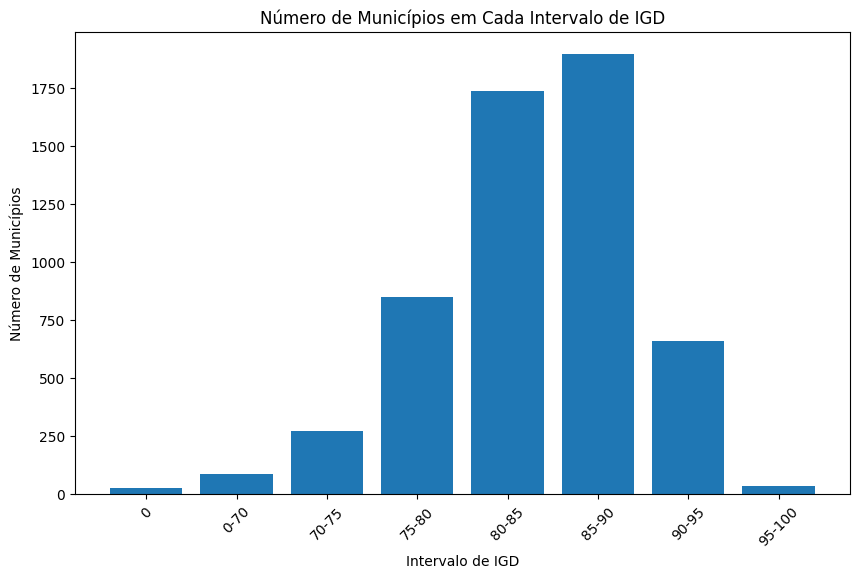

In [23]:
# Criando  um gráfico de barras para visualizar os resultados
plt.figure(figsize=(10, 6))
plt.bar(contagem_municipios['Intervalo'], contagem_municipios['Número de Municípios'])
plt.title('Número de Municípios em Cada Intervalo de IGD')
plt.xlabel('Intervalo de IGD')
plt.ylabel('Número de Municípios')
plt.xticks(rotation=45)
plt.show()

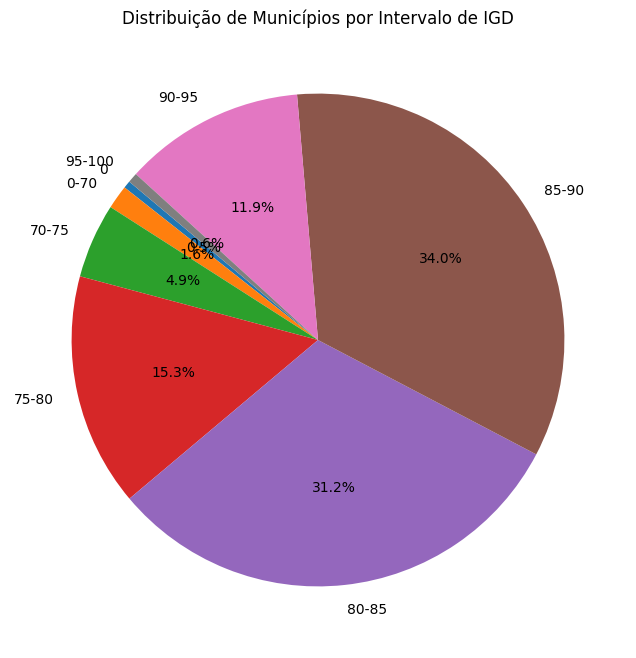

In [24]:
#Agora num gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(contagem_municipios['Número de Municípios'], labels=contagem_municipios['Intervalo'], autopct='%1.1f%%', startangle=140)

# Defina o título do gráfico
plt.title('Distribuição de Municípios por Intervalo de IGD')

# Mostre o gráfico
plt.show()

In [65]:
#Agora visualizar esses dados em uma mpa
georreferenciamento_df = pd.read_csv('https://raw.githubusercontent.com/kelvins/Municipios-Brasileiros/main/csv/municipios.csv')

#os dados de georreferenciamento tem 7 dígitos (vamos remover o dígito verificador e atualizar o dataframe)
georreferenciamento_df['codigo_ibge'] = georreferenciamento_df['codigo_ibge'].astype('str').map(lambda x: x[:-1]).astype('int')

georreferenciamento_df.head()

codigo_ibge                 nome  latitude  longitude  capital  codigo_uf  \
0       520005      Abadia de Goiás -16.75730   -49.4412        0         52   
1       310010  Abadia dos Dourados -18.48310   -47.3916        0         31   
2       520010            Abadiânia -16.19700   -48.7057        0         52   
3       310020               Abaeté -19.15510   -45.4444        0         31   
4       150010           Abaetetuba  -1.72183   -48.8788        0         15   

   siafi_id  ddd       fuso_horario  
0      1050   62  America/Sao_Paulo  
1      4001   34  America/Sao_Paulo  
2      9201   62  America/Sao_Paulo  
3      4003   37  America/Sao_Paulo  
4       401   91  America/Sao_Paulo

In [26]:
df_igd.columns

Index(['ibge_6', 'municipio', 'UF', 'ano_mês', 'igd_m', 'Ranking',
       'Intervalo'],
      dtype='object')

In [27]:
#cruzamento do dataframe resultados com as informações de georreferenciamento
df_igd_mapa = pd.merge(df_igd[['ibge_6', 'igd_m', 'Intervalo']],
                         georreferenciamento_df[['codigo_ibge', 'nome', 'latitude', 'longitude']],
                         left_on='ibge_6',
                         right_on='codigo_ibge',
                         how='inner')

In [54]:
df_igd_mapa.head()


ibge_6  igd_m Intervalo  codigo_ibge            nome  latitude  longitude
0  353770  99.20    95-100       353770         Piacatu  -21.5921   -50.6003
1  432330  99.13    95-100       432330     Vila Flores  -28.8598   -51.5504
2  431445  98.32    95-100       431445          Pinhal  -27.5080   -53.2082
3  352215  97.92    95-100       352215          Itaóca  -24.6393   -48.8413
4  411729  97.67    95-100       411729  Novo Itacolomi  -23.7631   -51.5079

In [29]:
#df_igd_mapa.to_csv(':\Users\sesup\Desktop\Bootcamp ENAP\projetos-do-bootcamp-analise-de-dados-enap-2023\presenca_das_politicas_publicas_sociais_nos_municipios\Camila',encoding = 'UTF-8')
#df_igd_mapa.to_csv(':\Users\sesup\Desktop\Bootcamp ENAP\projetos-do-bootcamp-analise-de-dados-enap-2023\presenca_das_politicas_publicas_sociais_nos_municipios\Camila',encoding = 'UTF-8')

In [53]:
!pip install requests
!pip install shapely
!pip install geojson_rewind
!pip install plotly -- upgrade
from geojson_rewind import rewind
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from geojson_rewind import rewind
import plotly.express as px
import plotly.io as pio
import json
from shapely.geometry import shape, mapping
from shapely.ops import unary_union
import json
import geojson_rewind
pio.renderers.default = 'iframe'


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
geojson = requests.get(f'http://servicodados.ibge.gov.br/api/v3/malhas/paises/BR?formato=application/vnd.geo+json&qualidade=minima').json()

In [50]:
#a malha geográfica do ibge tem 7 dígitos (vamos remover o dígito verificador e atualizar a malha)
for feature in geojson['features']:
    feature['properties']['codarea'] = feature['properties']['codarea'][:-1]
geojson = rewind(geojson, rfc7946=False)

In [55]:

fig = px.choropleth(df_igd_mapa,
                    geojson=geojson,
                    scope='south america',
                    color='Intervalo' ,
                    color_continuous_scale="Reds",
                    locations='ibge_6',
                    featureidkey='properties.codarea',
                    hover_name='nome').update_layout(height=800, width=1000, autosize=False)



fig.update_traces(marker_line_width=0)
# Exiba o mapa
fig.show()

C:\Users\sesup\AppData\Local\Programs\Python\Python311\Lib\site-packages\plotly\express\_core.py:2044: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

